# Import Librairies

In [575]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Import Dataset(s)

In [576]:
"""# monter le disque googleDrive
drive.mount('/content/drive')
#%cd /content/drive/Shareddrives/Ecole\ IA\ 4 Bordeaux/Partage\ Etudiants/       # PATH TO SHARED DRIVE
%cd /content/drive/MyDrive/Colab Notebooks/Data/Simplon_brief"""

"# monter le disque googleDrive\ndrive.mount('/content/drive')\n#%cd /content/drive/Shareddrives/Ecole\\ IA\\ 4 Bordeaux/Partage\\ Etudiants/       # PATH TO SHARED DRIVE\n%cd /content/drive/MyDrive/Colab Notebooks/Data/Simplon_brief"

In [577]:
data = pd.read_csv("Data/billionaire_list_20yrs.csv")
#data.info()        

# Data cleaning

In [578]:
display(data.shape)

(352369, 18)

In [579]:
# remove duplicate columns (because of daily_income, each name appear many times a year)
data.drop_duplicates(['name','annual_income'], inplace=True)

# make age real for today (year 2024)
data.age = 2023 - data.birth_year

# remove columns with redondent information
display(data[['name','last_name','name_cleaned']].sample(5))  # name_cleaned took care of removing "," and "()"
data.drop(['name','last_name'], axis=1, inplace=True)
data.name_cleaned = data.name_cleaned.apply(lambda x: x.replace("-"," ").capitalize()) # make name pretty

# remove unnecessary columns
data.drop(['company','wealth_source_details','industry','state','headquarters','daily_income','birth_year'], axis=1, inplace=True)
data.info()

# mettre l'argent en billion de dollars
data.annual_income /= 1e9

# umputer valeur de genre par defaut 'M;F' aux valeurs manquantes
data.loc[data.gender.isnull(),'gender'] = 'M;F'

,name,last_name,name_cleaned
204844,M.A. Yusuff Ali,Yusuff Ali,ma_yusuff_ali
291195,Sidney Kimmel,Kimmel,sidney_kimmel
306969,Susanne Zimmermann von Siefart,Zimmermann von Siefart,susanne_zimmermann_von_siefart
57751,Chen Huwen,Chen,chen_huwen
19394,Aloke Lohia,Lohia,aloke_lohia


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30912 entries, 0 to 352352
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         30912 non-null  int64 
 1   age                30912 non-null  int64 
 2   gender             28112 non-null  object
 3   time               30912 non-null  int64 
 4   permanent_country  25428 non-null  object
 5   main_industry      30912 non-null  object
 6   countries          30912 non-null  object
 7   annual_income      30912 non-null  int64 
 8   name_cleaned       30912 non-null  object
dtypes: int64(4), object(5)
memory usage: 2.4+ MB


In [580]:
# quelle est la proportion de valeurs nulles ?
print("verifie la proportion de valeurs nulles")


# on a remarque que countrie 'nan' etait une string alors on remplace par une valeur nulle
data.loc[data.permanent_country == 'nan','countries'] = np.NaN
for col in data.columns:
    print(f"{col} has {round(100*data[col].isnull().sum()/data[col].count())} % valeurs nulles")

verifie la proportion de valeurs nulles
Unnamed: 0 has 0 % valeurs nulles
age has 0 % valeurs nulles
gender has 0 % valeurs nulles
time has 0 % valeurs nulles
permanent_country has 22 % valeurs nulles
main_industry has 0 % valeurs nulles
countries has 0 % valeurs nulles
annual_income has 0 % valeurs nulles
name_cleaned has 0 % valeurs nulles


In [581]:
### remmetre les pays là ou il y a des valeur manquantes
#display(data[['permanent_country','countries']].sample(5))

# reinitialise les codes pays avec le dernier element de la liste spearé par ';'
data['.countries'] = data.countries.apply(lambda x: str(x).split(";")[0])
# reinitialise les noms pays avec le premier element de la liste spearé par '-'
data.permanent_country = data.permanent_country.apply(lambda x: str(x).split("-")[0])

In [584]:
#construit dictionnaire des noms de pays en fonction des codes pays
country_dict = {}
for name,code in zip(data.permanent_country, data['.countries']):
    if name != 'nan':
        country_dict[code] = name

display(country_dict)

# attribue le nom de pays en fonction du code pays
#data['permanent_country_good'] = [country_dict[code] for code in data['countries'] if code.isnull()]
#display(data[['permanent_country','permanent_country_good','countries']].sample(20))
#data.drop(['countries'], axis=1, inplace=True)

# check values were filled
#data.info()

{'are': 'United Arab Emirates',
 'chn': 'China',
 'ita': 'Italy',
 'mex': 'Mexico',
 'usa': 'United States',
 'fra': 'France',
 'gbr': 'United Kingdom',
 'ind': 'India',
 'deu': 'Germany',
 'arg': 'Mexico',
 'che': 'Switzerland',
 'tha': 'Thailand',
 'bra': 'Brazil',
 'chl': 'Chile',
 'nor': 'Norway',
 'jpn': 'Japan',
 'irl': 'United States',
 'nld': 'Netherlands',
 'idn': 'Indonesia',
 'mys': 'Malaysia',
 'kor': 'South Korea',
 'aus': 'Melbourne',
 'sgp': 'China',
 'mar': 'Morocco',
 'rus': 'Russia',
 'mco': 'Monaco',
 'sau': 'Saudi Arabia',
 'nga': 'Nigeria',
 'isr': 'Israel',
 'dnk': 'Denmark',
 'tur': 'Turkey',
 'can': 'China',
 'esp': 'Spain',
 'kaz': 'Kazakhstan',
 'prt': 'Portugal',
 'per': 'Peru',
 'cze': 'Czech Republic',
 'phl': 'Philippines',
 'swe': 'Sweden',
 'fin': 'Finland',
 'grc': 'Brazil',
 'lbn': 'Lebanon',
 'bel': 'Kazakhstan',
 'kwt': 'Kuwait',
 'geo': 'Kazakhstan',
 'npl': 'Nepal',
 'col': 'Colombia',
 'zaf': 'South Africa',
 'lie': 'Liechtenstein',
 'nzl': 'Singa

In [586]:
# nettoyer permanent countries A LA MAIN !!!

#display(data.permanent_country.sample(20))
# on ne garde que le premier terme avant "-"
data.permanent_country = data.permanent_country.apply(lambda x : str(x).split('-')[0])
#display(data[['countries','permanent_country']].sample(20))
# on utilise le code country usa pour attribuer United States aux permanent country qui sonot nan
#data.loc[data.permanent_country.isnull()]  # il n'y a pas de valeur nulle alors on regarde avec la string 'nan'
#data.loc[(data.permanent_country == 'nan')&(data.countries == 'usa')][['countries','permanent_country']].sample(20)
data.loc[(data.permanent_country == 'nan')&(data.countries == 'usa'), 'permanent_country'] = 'United States'
data.loc[data.permanent_country == 'USA', 'permanent_country'] = 'United States'

#display(data[['countries','permanent_country']].sample(20))
data.loc[(data.permanent_country == 'nan')&(data.countries == 'fra'), 'permanent_country'] = 'France'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'aus'), 'permanent_country'] = 'Australia'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'esp'), 'permanent_country'] = 'Espagne'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'ind'), 'permanent_country'] = 'India'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'deu'), 'permanent_country'] = 'Germany'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'prt'), 'permanent_country'] = 'Portugal'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'rus'), 'permanent_country'] = 'Russia'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'kor'), 'permanent_country'] = 'Korea'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'can'), 'permanent_country'] = 'Canada'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'jpn'), 'permanent_country'] = 'Japan'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'tur'), 'permanent_country'] = 'Turkey'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'ita'), 'permanent_country'] = 'Italy'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'gbr'), 'permanent_country'] = 'Great Britain'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'bra'), 'permanent_country'] = 'Brazil'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'sgp'), 'permanent_country'] = 'Singapor'
data.loc[(data.permanent_country == 'nan')&(data.countries == 'pol'), 'permanent_country'] = 'Poland'
data.loc[(data.permanent_country == 'nan')&(data.countries.str.startswith('chn')), 'permanent_country'] = 'China'

In [ ]:
data[['permanent_country','countries']].sample(20)

,permanent_country,countries
318403,United States,usa
154962,Brazil,bra
340009,Germany,deu
252900,Switzerland,fra
50636,China,chn
317653,Kazakhstan,kaz
198229,China,chn
101707,Germany,deu
29712,United States,usa
966,Germany,deu


In [421]:
data.loc[data.time ==2022].groupby('permanent_country')['permanent_country'].count().sort_values(ascending=False)[:10]

data.loc[(data.time ==2022)&(data.permanent_country == 'China'), 'main_industry']

120                  Estate Holding
191            Consumer Electronics
755             Industrial Products
937                      Publishing
1437      Jewellery、 Estate Holding
                    ...            
351982                Manufacturing
351984                Manufacturing
352014       Construction Materials
352038              Auto Components
352043                  Diversified
Name: main_industry, Length: 894, dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30912 entries, 0 to 352352
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         30912 non-null  int64  
 1   age                30912 non-null  int64  
 2   gender             30912 non-null  object 
 3   time               30912 non-null  int64  
 4   permanent_country  30912 non-null  object 
 5   main_industry      30912 non-null  object 
 6   annual_income      30912 non-null  float64
 7   name_cleaned       30912 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 2.1+ MB


# heatmmap(correlation)  //  pairplot    //  

In [561]:
#sns.pairplot(data)


# Data eploration - age

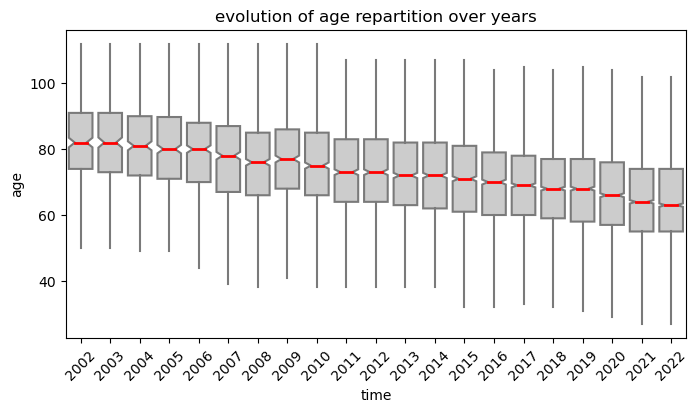

In [599]:
# how old are the rich?
# https://seaborn.pydata.org/generated/seaborn.boxplot.html

fig  = plt.figure(figsize=(8,4))

sns.boxplot(data=data, x='time', y='age',
            notch=True, showcaps=False,
            flierprops={"marker": "x"},    
            medianprops={"color": "r", "linewidth": 2},
            color=".8",
            showfliers=False)

plt.xticks(rotation=45)
plt.title("evolution of age repartition over years")
plt.show()

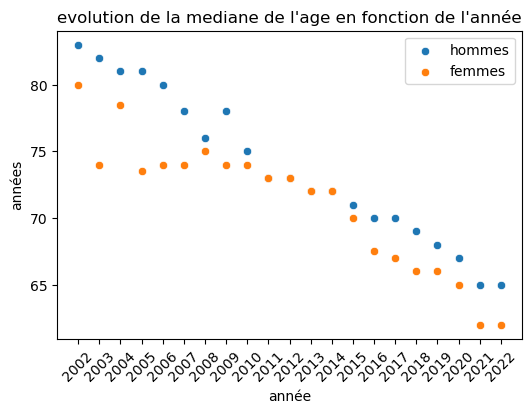

In [611]:
plt.figure(figsize=(6,4))
sns.scatterplot(data.loc[data.gender =='M'].groupby('time')['age'].median())
sns.scatterplot(data.loc[data.gender =='F'].groupby('time')['age'].median())
#sns.scatterplot(data.groupby('time')['annual_income'].sum())

plt.legend(['hommes','femmes'],loc='upper right')
plt.title("evolution de la mediane de l'age en fonction de l'année")
plt.xticks(data.time.unique(), rotation=45)
plt.xlabel("année")
plt.ylabel("années")
plt.show()

In [ ]:
display(data.gender.isnull().value_counts())
display(data.gender.value_counts())
# make gender data a numeric
data['gender_num'] = data.gender.apply(lambda x: 0 if x == 'M' else 1 if x == 'F' else 2 )

False    30912
Name: gender, dtype: int64

M      25208
F       2893
M;F     2811
Name: gender, dtype: int64

In [630]:
to_plot_final.index.values

array(['Finance & Investments', 'Fashion & Retail', 'Technology'],
      dtype=object)

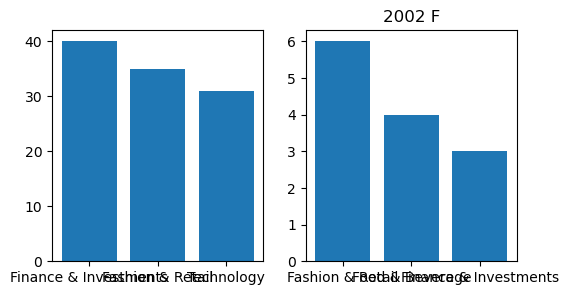

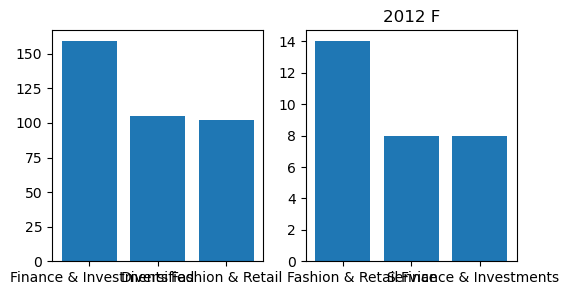

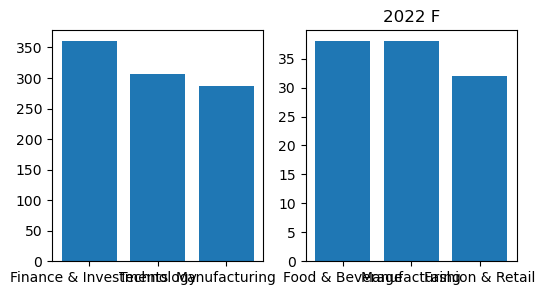

In [633]:

j=0
for year in [2002,2012,2022]:

    to_plot = data.loc[data.time == year]
    fig, ax = plt.subplots(1,2, figsize=(6,3))
    i=0
    
    for gend in ['M','F']:
        to_plot_2 = to_plot.loc[to_plot.gender == gend]

        if not to_plot_2.empty:
            to_plot_final = to_plot_2.groupby('main_industry')['gender'].count().sort_values(ascending=False)[:3]

            ax[i].bar(x=to_plot_final.index,height=to_plot_final.values)
            #ax[i].set_xlabel(xlabel=to_plot_final.index.values,rotation=35)
        i=1
    title = str(year)+" "+gend
    ax[i].set_title(title)
        
    
    plt.xlabel("")
j+=1    
  
plt.show()


[]

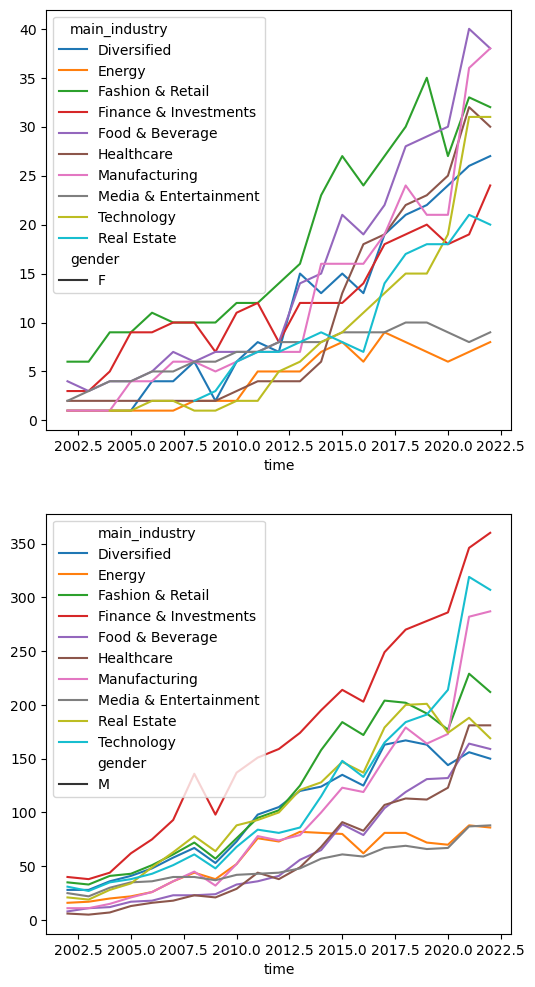

In [600]:
most_20_indus = data.main_industry.value_counts()[:5]
most_20_indus.index.tolist()


fig,ax = plt.subplots(2,1,figsize=(6,12))
i=0
for gend in ['F','M']:
    to_use = data.loc[(data.gender == gend)]#&(data.main_industry.isin(most_20_indus.index))]
    most_20_indus = to_use.loc[to_use.time == 2022].main_industry.value_counts()[:10]
    to_use = to_use.loc[(data.main_industry.isin(most_20_indus.index.tolist()))]
    df=to_use.groupby(['gender','time','main_industry'])['main_industry'].count()

    sns.lineplot(ax = ax[i] ,data=df, x="time", y=df.values, hue="main_industry", style="gender")
    i+=1
plt.legend(loc='upper left')
plt.plot()


<Axes: >

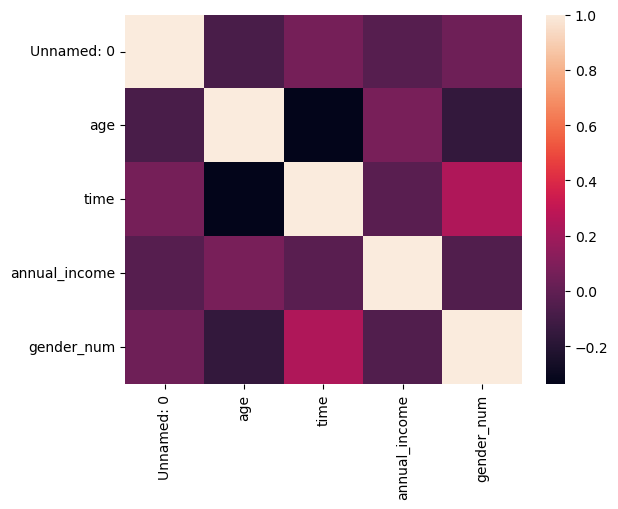

In [ ]:
sns.heatmap(data.corr())

In [ ]:
to_use = data.groupby('permanent_country')['gender_num'].count().sort_values(ascending=False)
display(to_use[:5])
prop_ = to_use[2]/to_use.sum()
print(f"Il y a {round(prop_*100)}% de valeurs nulles")

permanent_country
United States    9334
China            6534
nan              5141
Germany          1381
Switzerland       859
Name: gender_num, dtype: int64

Il y a 17% de valeurs nulles


In [ ]:
data.age.sum() == False

False

In [ ]:
sns.displot(data.permanent_country.sort())


AttributeError: 'Series' object has no attribute 'sort'

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30912 entries, 0 to 352352
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         30912 non-null  int64  
 1   age                30912 non-null  int64  
 2   gender             30912 non-null  int64  
 3   time               30912 non-null  int64  
 4   permanent_country  30912 non-null  object 
 5   main_industry      30912 non-null  object 
 6   annual_income      30912 non-null  float64
 7   name_cleaned       30912 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 2.1+ MB


In [409]:
# who are the richest in the last year?

rich_2022 = data.loc[data.time == 2022, ['name_cleaned','annual_income']]
rich_2022 = rich_2022.sort_values(by='annual_income', ascending=False)[:5]
rich_2022 = rich_2022.name_cleaned.values

to_plot = data.loc[data.name_cleaned.isin(rich_2022)]  # only 10 richest of 2022
display(to_plot[['name_cleaned','time','annual_income']].sample(3))

,name_cleaned,time,annual_income
42023,Bill_gates,2008,1.93314
38854,Bernard_arnault,2014,1.01706
42275,Bill_gates,2020,2.69598


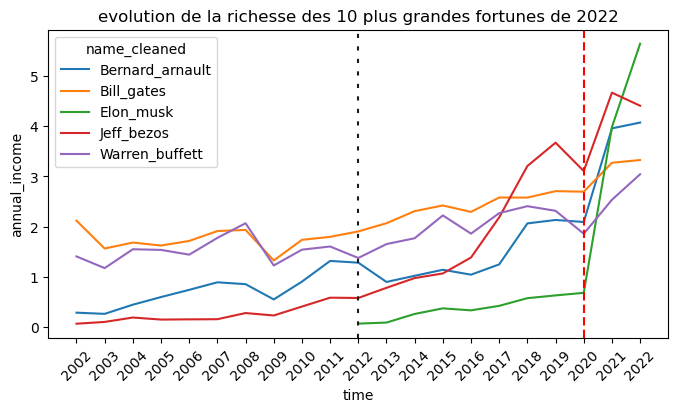

In [410]:
# how did their wealth evolve ?

fig = plt.figure(figsize=(8,4))
ax = sns.lineplot(data=to_plot, x='time', y='annual_income', hue='name_cleaned')
ax.axvline(2012, color=".1", dashes=(2, 4))
ax.axvline(2020, color="r", dashes=(4, 2))

plt.title("evolution de la richesse des 10 plus grandes fortunes de 2022")
plt.xticks(ticks=data.time.unique(), labels = data.time.unique(), rotation=45)
plt.show()

# Data cleaning 2

In [ ]:
# ouvre les autres fichiers
data_2023 = pd.read_csv("Data/Billionaires Statistics Dataset.csv")
data_2022 = pd.read_csv("Data/2022_forbes_billionaires.csv")
data_2021 = pd.read_csv("Data/Billionaire2021.csv")
data_2020 = pd.read_csv("Data/Forbes_Billionaires2020.csv")
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               2095 non-null   int64  
 1   Name               2095 non-null   object 
 2   Net Worth          2095 non-null   object 
 3   Age                2052 non-null   float64
 4   Country/Territory  2095 non-null   object 
 5   Source             2095 non-null   object 
 6   Industries         2095 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 114.7+ KB


In [ ]:
# reduce dataset size and change name columns for merge
data_2020 = data_2020[['Name','Net Worth']].rename(columns={'Name': 'personName'})
data_2021 = data_2021[['Name','NetWorth']].rename(columns={'Name': 'personName'})
data_2022 = data_2022[['name','networth']].rename(columns={'name': 'personName'})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   personName  2095 non-null   object
 1   Net Worth   2095 non-null   object
dtypes: object(2)
memory usage: 32.9+ KB


In [ ]:
# process columns for name
def process_name(x):
  return x.capitalize()
data_2023.personName = data_2023.personName.apply(process_name)
data_2022.personName = data_2022.personName.apply(process_name)
data_2022.personName = data_2022.personName.apply(lambda x: x.strip())
data_2021.personName = data_2021.personName.apply(process_name)
data_2020.personName = data_2020.personName.apply(process_name)

In [ ]:
# process columns for wealth
def process_worth(x):
  return float(x[1:].replace('B',''))
data_2020['Net Worth'] = data_2020['Net Worth'].apply(process_worth)
data_2021.NetWorth = data_2021.NetWorth.apply(process_worth)
data_2022.networth = data_2022.networth.apply(process_worth)
data_2023.finalWorth = data_2023.finalWorth/1000

In [ ]:
e = data_2023[['personName','finalWorth']].merge(data_2022, on=['personName'], how='left')\
                                                  .merge(data_2021, on=['personName'], how='left')\
                                                  .merge(data_2020, on=['personName'], how='left')

e.columns=['nom','2023','2022','2021','2020']


In [ ]:
x = [int(a) for a in e.columns[1:]]


Index(['2023', '2022', '2021', '2020'], dtype='object')

In [ ]:
most_10_wealth

array(['Bernard arnault & family', 'Elon musk', 'Jeff bezos',
       'Larry ellison', 'Warren buffett', 'Bill gates',
       'Michael bloomberg', 'Carlos slim helu & family', 'Mukesh ambani',
       'Steve ballmer'], dtype=object)

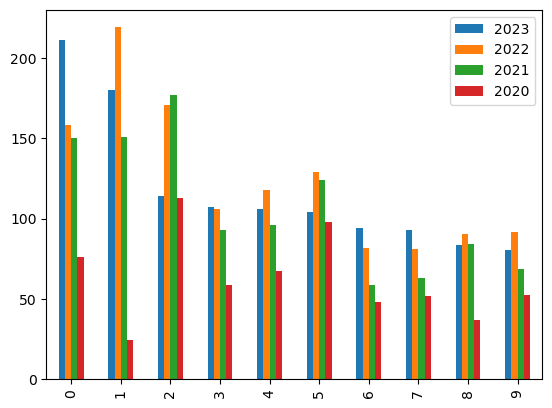

In [ ]:
most_10_wealth = data_2023.sort_values(by='finalWorth', ascending=False)['personName'][:10].values
e.loc[e.nom.isin(most_10_wealth)].plot.bar(label=most_10_wealth)
plt.show()

# Analyse préliminaire

In [ ]:
data_2023.gdp_country
data.groupby('country')['finalWorth','gdp_country'].agg({'finalWorth':'sum','gdp_country':'std'})

KeyError: 'country'

In [ ]:
data.groupby('firstName')['firstName'].value_counts().sort_values()

KeyError: 'firstName'

In [ ]:
def tranche_age(age):
  if age <= 30:
    return '- 30'
  elif age <= 40:
    return '30-40'
  elif age <= 50:
    return '40-50'
  elif age <= 60:
    return '50-60'
  elif age <= 70:
    return '60-70'
  elif age <= 80:
    return '70-80'
  else:
    return '80 +'

data['tranche_age'] = data.age.apply(lambda x: tranche_age(x))

In [ ]:
data.groupby('tranche_age')['finalWorth'].agg(['mean','count']).plot.bar(figsize=(4,3))

KeyError: 'Column not found: finalWorth'

In [ ]:
data.groupby('tranche_age')['firstName'].count()

tranche_age
- 30      15
30-40     69
40-50    239
50-60    678
60-70    660
70-80    572
80 +     404
Name: firstName, dtype: int64

In [ ]:
# mettre date et birthdate en format datetime
data['birthDate'] = pd.to_datetime(data['birthDate'])
data['date'] = pd.to_datetime(data['date'])

<Axes: ylabel='Frequency'>

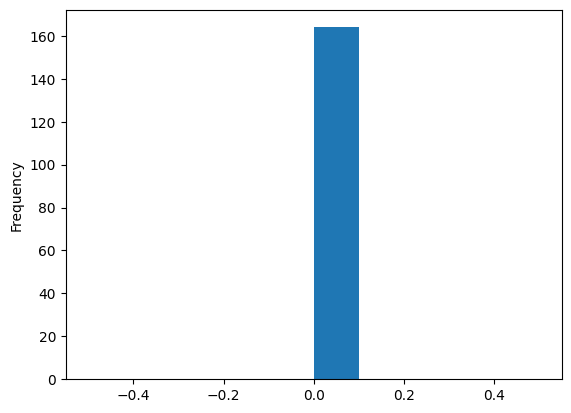

In [ ]:
# changer type de gdp country en numerique
data.gdp_country = data.gdp_country.apply(lambda x: str(x).replace(',',''))
data.gdp_country = data.gdp_country.apply(lambda x: int(x.replace('nan','0').strip('$')))
country_no_gtp = data.loc[data.gdp_country==0, 'country'].unique()     # there are country with gdp not indicated
data.loc[data.country.isin(country_no_gtp), 'gdp_country'].plot.hist() # none of these have gdp so we can't

In [ ]:
for col in data.columns:
  if data[col].isnull().sum() > 0:
    print(f"{col}  \t\t\t=> {data[col].isnull().sum()} valeurs nulles")

age  			=> 65 valeurs nulles
country  			=> 38 valeurs nulles
city  			=> 72 valeurs nulles
organization  			=> 2315 valeurs nulles
birthDate  			=> 76 valeurs nulles
firstName  			=> 3 valeurs nulles
title  			=> 2301 valeurs nulles
state  			=> 1887 valeurs nulles
residenceStateRegion  			=> 1893 valeurs nulles
birthYear  			=> 76 valeurs nulles
birthMonth  			=> 76 valeurs nulles
birthDay  			=> 76 valeurs nulles
cpi_country  			=> 184 valeurs nulles
cpi_change_country  			=> 184 valeurs nulles
gdp_country  			=> 164 valeurs nulles
gross_tertiary_education_enrollment  			=> 182 valeurs nulles
gross_primary_education_enrollment_country  			=> 181 valeurs nulles
life_expectancy_country  			=> 182 valeurs nulles
tax_revenue_country_country  			=> 183 valeurs nulles
total_tax_rate_country  			=> 182 valeurs nulles
population_country  			=> 164 valeurs nulles
latitude_country  			=> 164 valeurs nulles
longitude_country  			=> 164 valeurs nulles


In [ ]:
"""for a,b in zip(data.age,2023-pd.to_datetime(data.birthDate).dt.year):
  if a != b:
    print("age",a,"  calculated",b)"""

'for a,b in zip(data.age,2023-pd.to_datetime(data.birthDate).dt.year):\n  if a != b:\n    print("age",a,"  calculated",b)'

In [ ]:
data_countries = data.loc[:,data.columns.str.endswith('country')]

In [ ]:
data.loc[data.tax_revenue_country_country.isnull(),]

TypeError: ignored

In [ ]:
data.loc[data.age != 2022 - pd.to_datetime(data.birthDate).dt.year, ['age','birthDate']]

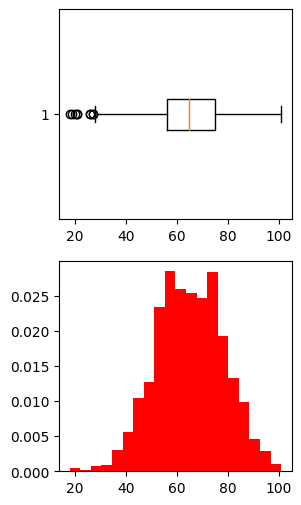

In [ ]:
import matplotlib.pyplot as plt

to_plot = data.loc[~data.age.isnull()]         # filtrate out the data with no data
fig, ax = plt.subplots(2,1,figsize=(3,6))

ax[0].boxplot(to_plot.age, vert=False)
ax[1].hist(to_plot.age, bins=20, density=True, color='red')

plt.show()

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(2,1,figsize=(3,6))
sns.boxplot(x=to_plot.age, orient='h', ax=ax[0])
ax[0].set_title('Box Plot of Age')
ax[0].set_xlabel('Values')

# Histogram on the second subplot (ax[1) with blue bars and a red density curve
sns.histplot(data=to_plot.age, bins=20, kde=True, color='blue', ax=ax[1])
ax[1].set_title('Histogram of Age')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Frequency')

# Change the color of the density curve to red
ax[1].lines[0].set_color('red')

plt.show()

NameError: name 'plt' is not defined

In [ ]:
Q1,Q3 = np.quantile(to_plot.age, [0.25,0.75])
IQ = Q3-Q1
flyers = Q1-1.5*IQ
data.loc[data['age'] <= flyers]

In [ ]:
data.describe()

In [ ]:
data.country.unique()

In [ ]:
to_plot['count'].values[0]

In [ ]:
# replace missing age value by the
data.loc[data.age.isnull() & data.birthDate.isnull(),"age"] = data.age.median()

to_plot_all = data.groupby('country')['rank','age'].agg(['count','median'])
to_plot = to_plot_all.age

#colors = ['red' if median_value > threshold else 'blue' for median_value in sorted_data]

colors = ['green' if val == 35 else 'red' if val > 50 else 'blue' for val in to_plot['count'].values]




to_plot['median'].sort_values(ascending=False).plot.barh(title='Age median par pays',
                                                         color=colors,
                                                         figsize=(3,12))
labels_ = [to_plot.index.values[i]+" - "+str(to_plot['count'].values[i]) for i in range(len(to_plot))]
plt.yticks(range(len(to_plot.index)), labels_)

plt.show()

In [ ]:
### MAKING A TOP 3 COUNTRY FOR AGES

# oldest age in what country?
data.loc[data.age.max(),'country']
# youngest age in what country?
data.loc[data.age.min(),'country']

# groupby country
age_by_country = data.groupby('country').agg({'rank':'count','age':'mean'}).sort_values(by='age')
# 3 yougest average in what country?
age_by_country[:3]
# oldest average in what country?
age_by_country[-3:]

In [ ]:
# giving no age the age of the median

In [ ]:
# comparaison F/H
data.gender.value_counts().plot.pie(autopct='%1.1f%%',
                                    title = 'Répartition par genre des Milliardaires',
                                    labels=['Hommes','Femmes'],
                                    colors=['b','r'])

In [ ]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(figsize=(3,6))
ax1 = fig.subplot()
ax1.plot.box(data.age)